<a href="https://colab.research.google.com/github/linker81/COVID19-Italy/blob/master/COVID19_Italy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization and Simple Analysis of COVID19 Data - Italy

**Used Data**

[Protezione Civile - National Data](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv)

[Protezione Civile - Regional Data](https://github.com/pcm-dpc/COVID-19/blob/master/dati-regioni/dpc-covid19-ita-regioni.csv)


**Inspired by**:

https://github.com/ItalianPepper/COVID19-Italy-Analysis

https://github.com/albertomercurio/covid-19_italy



\\
***For Study Purpose Only***

In [1]:
import urllib
# Download .csv file from official profile of Protezione Civile.
raw_git_url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
csv_name_national = "dpc-covid19-ita-andamento-nazionale.csv"
urllib.request.urlretrieve(raw_git_url, csv_name_national)

('dpc-covid19-ita-andamento-nazionale.csv',
 <http.client.HTTPMessage at 0x7fca0dadd438>)

In [2]:
raw_git_url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
csv_name_regional = "dpc-covid19-ita-regioni.csv"
urllib.request.urlretrieve(raw_git_url, csv_name_regional)

('dpc-covid19-ita-regioni.csv', <http.client.HTTPMessage at 0x7fca0daddb00>)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

df_ita_covid = pd.read_csv(csv_name_national, sep=",", header=0)
dates_col = df_ita_covid["data"].tolist()

tot_casi_col = df_ita_covid["totale_casi"].tolist()
tot_healed_col = df_ita_covid["dimessi_guariti"].tolist()
tot_deaths_col = df_ita_covid["deceduti"].tolist()
new_positive_col = df_ita_covid["nuovi_positivi"].tolist()
tot_positive_col = df_ita_covid["totale_positivi"].tolist()
tot_swabs_col = df_ita_covid["tamponi"].tolist()

tot_hospitalized = df_ita_covid["ricoverati_con_sintomi"].tolist()
tot_dom = df_ita_covid["isolamento_domiciliare"].tolist()
intensitive_care = df_ita_covid["terapia_intensiva"].tolist()

In [0]:
def plot_figure(dates, value, colors, legends, title=''):
  print(title)
  
  n_plots = len(np.shape(value))
  if (n_plots > 1):
    N = np.shape(value)[0]  
    for i in range(0, N):
      plt.plot_date(dates, value[i], '.' + colors[i] + '-', xdate=True )
  else:
    plt.plot_date(dates, value, '.' + colors + '-', xdate=True )
  
  plt.legend(legends)
  plt.title(title)
  plt.xticks(rotation=90)
  plt.show()
  plt.close()

Casi Totali


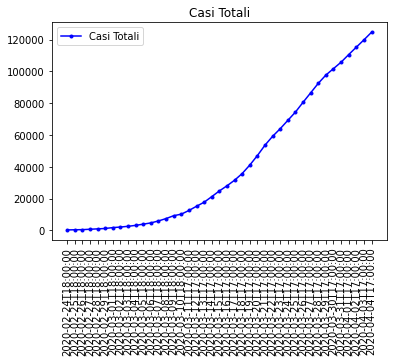

Guariti-Decessi


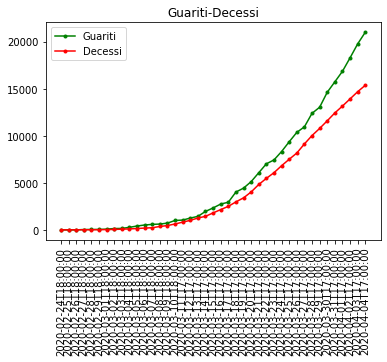

Nuovi Positivi


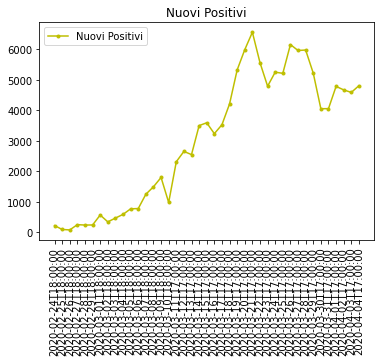

Tamponi-Totale Positivi


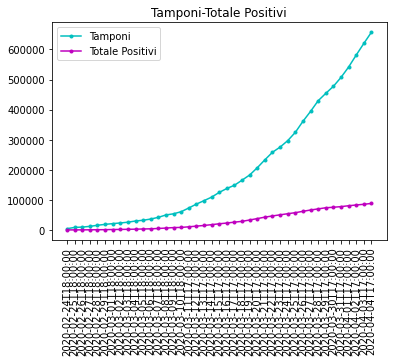

Ricoverati con sintomi - Terapia Intesiva - Domiciliari


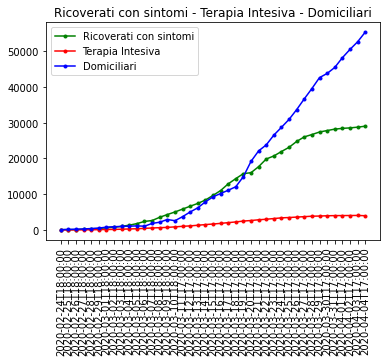

Attualmente Positivi - Decessi


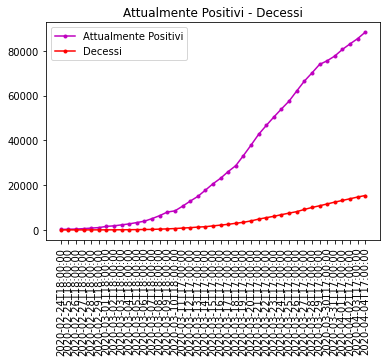

In [5]:
plot_figure(dates_col, tot_casi_col, 'b', legends=['Casi Totali'], 
            title='Casi Totali')

plot_figure(dates_col, [tot_healed_col, tot_deaths_col], ['g', 'r'], 
            legends=['Guariti', 'Decessi'], 
            title='Guariti-Decessi')

plot_figure(dates_col, new_positive_col, 'y', legends=['Nuovi Positivi'], 
            title = 'Nuovi Positivi')

plot_figure(dates_col, [tot_swabs_col, tot_positive_col], ['c', 'm'], 
            legends=['Tamponi', 'Totale Positivi'], 
            title='Tamponi-Totale Positivi')

plot_figure(dates_col, [tot_hospitalized, intensitive_care, tot_dom], 
            ['g', 'r', 'b'], legends=['Ricoverati con sintomi', 'Terapia Intesiva', 'Domiciliari'], 
            title='Ricoverati con sintomi - Terapia Intesiva - Domiciliari')

plot_figure(dates_col, [tot_positive_col, tot_deaths_col], 
            ['m', 'r'], legends=['Attualmente Positivi', 'Decessi'], 
            title='Attualmente Positivi - Decessi')


In [6]:
last_date = dates_col[len(dates_col)-1]

print("Ultimo aggiornamento / Last Update:", last_date)
print("Numero di casi / Number of Cases: ", tot_casi_col[len(tot_casi_col)-1]);
print("Guariti / Recovered: ", tot_healed_col[len(tot_healed_col)-1]);
print("Decessi / Deaths: ", tot_deaths_col[len(tot_deaths_col)-1]);
print("---")

last_obs_deaths = tot_deaths_col[len(tot_deaths_col)-1]
last_total_cases = tot_casi_col[len(tot_casi_col)-1]

last_obs_positives = tot_positive_col[len(tot_positive_col)-1]

letality_percent = (last_obs_deaths/last_total_cases)*100

print("[Decessi Totali / Casi Totali]:", 
      letality_percent, '%')
print("---")

Ultimo aggiornamento / Last Update: 2020-04-04T17:00:00
Numero di casi / Number of Cases:  124632
Guariti / Recovered:  20996
Decessi / Deaths:  15362
---
[Decessi Totali / Casi Totali]: 12.325887412542526 %
---


In [0]:
df_regioni_covid = pd.read_csv(csv_name_regional, sep=",", header=0, parse_dates=['data'])

#Forecasts

In [0]:
def f_logistic(x, a, b, c):
  # a = midpoint
  # b = curve steepness (logistic growth)
  # c = max value
  return (c / (1 + np.exp(-b*(x-a))))

In [0]:
def f_gompertz(x, a, b, c):
  # a max value
  # b sets the displacement along the x-axis
  # c sets the growth rate
  return a*np.exp(-np.exp(b-c*x))

In [0]:
def avg_err(pcov):
    return np.round(np.sqrt(np.diag(pcov)).mean(), 2)

In [0]:
def retrieve_region (region_name = 'Campania', plot_fig=True):
  df_regione = df_regioni_covid[df_regioni_covid['denominazione_regione'] == region_name]

  df_regione.index = df_regione["data"]
  df_regione.sort_index(inplace=True)
  
  dates_col = df_regione.index.astype('str').tolist()
  tot_casi_col = df_regione["totale_casi"].tolist()
  tot_healed_col = df_regione["dimessi_guariti"].tolist()
  tot_deaths_col = df_regione["deceduti"].tolist()
  new_positive_col = df_regione["nuovi_positivi"].tolist()
  tot_positive_col = df_regione["totale_positivi"].tolist()
  tot_swabs_col = df_regione["tamponi"].tolist()

  tot_hospitalized = df_regione["ricoverati_con_sintomi"].tolist()
  tot_dom = df_regione["isolamento_domiciliare"].tolist()
  intensitive_care = df_regione["terapia_intensiva"].tolist()

  if (plot_fig):
    plot_figure(dates_col, tot_casi_col, 'b', legends=['Casi Totali'], 
                title='Casi Totali' + ' ' + region_name) 
  
  return [dates_col, tot_casi_col, tot_healed_col, tot_deaths_col, new_positive_col,
     tot_positive_col, tot_swabs_col, tot_hospitalized, tot_dom, 
     intensitive_care]

In [0]:
def forecast_using_curve_fit(dates, values, time_horizon = 20, title='', ylabel='',
                           stop_at_previous_days = -1, mode = 'logistic', 
                            plot_fig=True):
  from scipy.optimize import curve_fit
  onset_date = dates[0]

  # How it is the forecasting in the previous days?
  if (stop_at_previous_days == -1):
    x = np.arange(0, len(dates))
    y = np.squeeze(values)
    title += ' [' + str(dates[-1]) + ']'
  else:
    x = np.arange(0, len(dates) - stop_at_previous_days)
    y = np.squeeze(values[:-stop_at_previous_days])
    title += ' Situazione ' + str(stop_at_previous_days) + ' days ago [' + \
    str(dates[-stop_at_previous_days-1]) + ']'

  if (mode == 'logistic'):
    lower = [10., 0.07, y.mean()]
    upper = [100., 1.0, 10*y.max()]

    popt_sig, pcov_sig = curve_fit(f_logistic, x, y, method='dogbox', 
                                  bounds=(lower,upper))

    x_m = np.arange (len(y) + time_horizon)
    y_m = f_logistic (x_m, *popt_sig)

  elif (mode == 'gompertz'):
    lower = [y.mean(), 1.1, 0.01]
    upper = [10*y.max(), 10.0, 1.0]
   
    popt_sig, pcov_sig = curve_fit(f_gompertz, x, y, method='dogbox', 
                                  bounds=(lower,upper))

    x_m = np.arange (len(y) + time_horizon)
    y_m = f_gompertz (x_m, *popt_sig)

  else:
    print ('ERROR - modality not available')

  if (plot_fig):
    # creating the matplotlib visualization
    plt.figure(figsize=(12,8))
    plt.plot(x_m, y_m, c='k', marker=".", linestyle='dashed') 
    #for i in np.arange(0, len(x_m)):
    #  plt.text(x_m[i]+.5, y_m[i], str(int(y_m[i])), size = 10)

    plt.text(x_m[-1]+.5, y_m[-1], str(int(y_m[-1])), size = 10)

    plt.plot(x, y, c='r', marker=".")
    plt.legend(['Forecast', 'Actual'])
    plt.xlabel("Days From Onset " + str(onset_date))
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()

  return x_m, y_m

In [0]:
time_horizon = 20

Casi Totali Campania


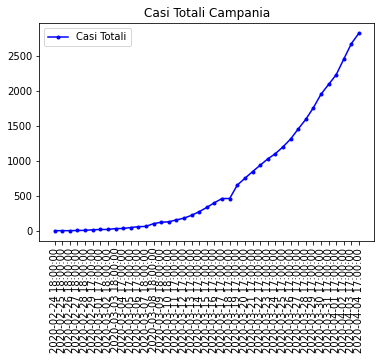

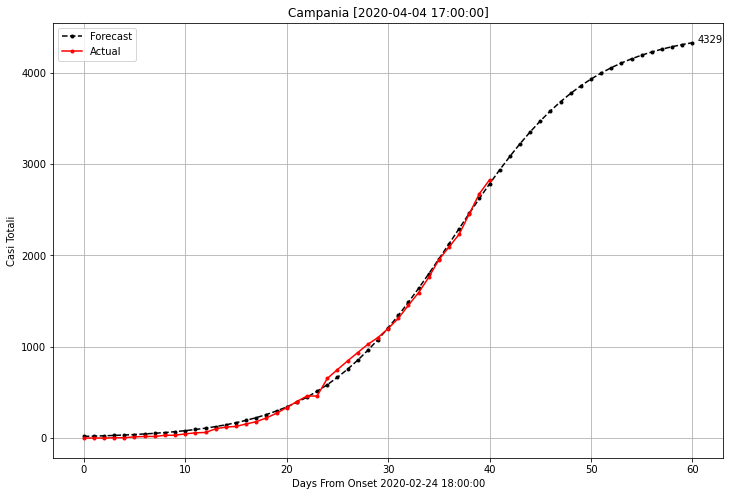

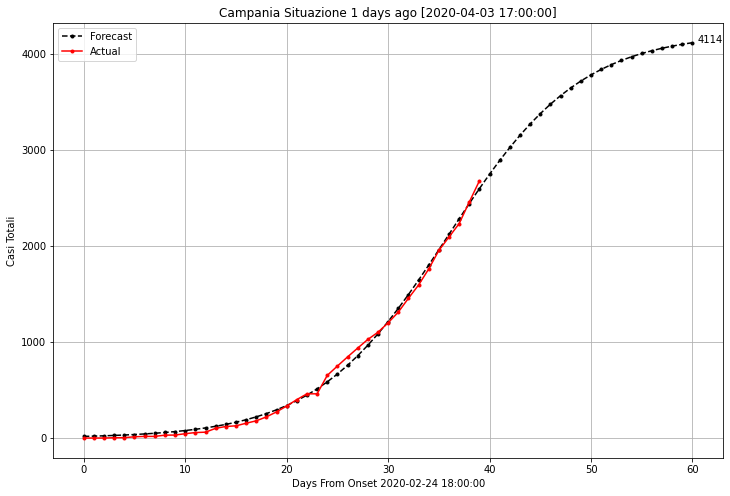

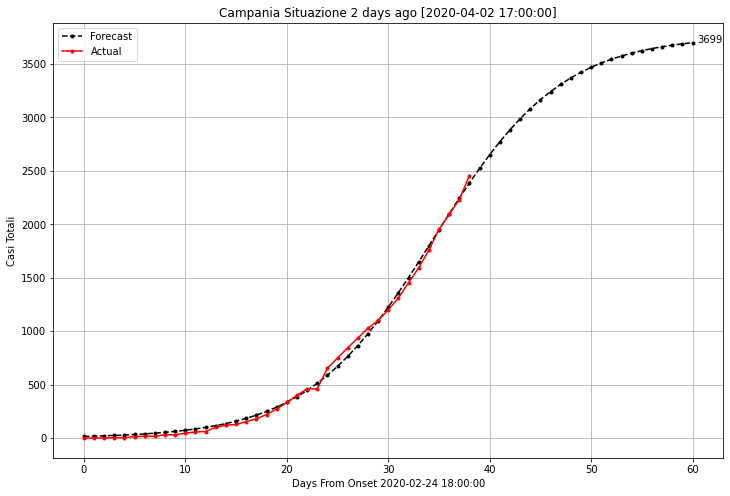

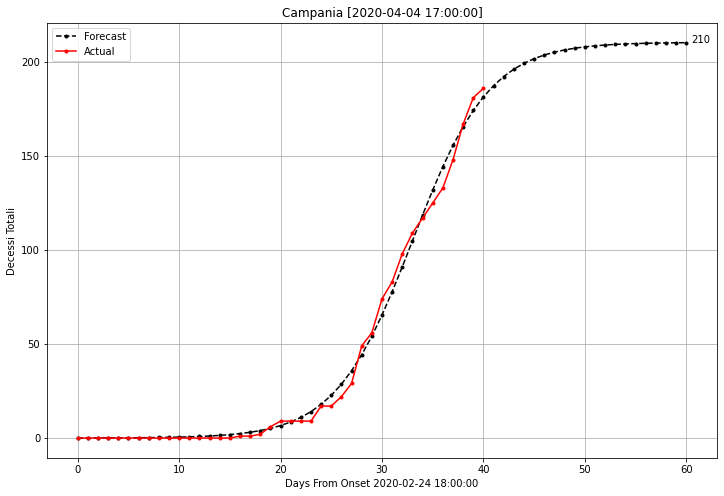

In [14]:
region_name = 'Campania'
[dates_col, tot_casi_col, tot_healed_col, tot_deaths_col, new_positive_col,
     tot_actual_positive_col, tot_swabs_col, tot_hospitalized, tot_dom, 
     intensitive_care] = retrieve_region (region_name = region_name)

_, _ = forecast_using_curve_fit(dates_col, tot_casi_col, time_horizon=time_horizon, title=region_name, ylabel='Casi Totali')
_, _ = forecast_using_curve_fit(dates_col, tot_casi_col, time_horizon=time_horizon + 1, title=region_name, ylabel='Casi Totali', stop_at_previous_days=1)
_, _ = forecast_using_curve_fit(dates_col, tot_casi_col, time_horizon=time_horizon + 2, title=region_name, ylabel='Casi Totali', stop_at_previous_days=2)

_, _ = forecast_using_curve_fit(dates_col, tot_deaths_col, time_horizon=time_horizon, title=region_name, ylabel='Decessi Totali')

Casi Totali Puglia


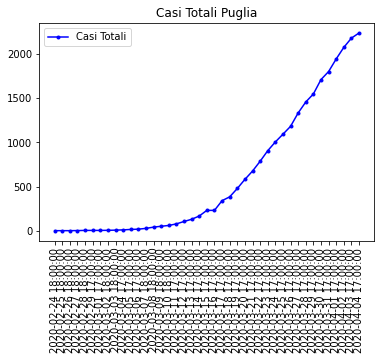

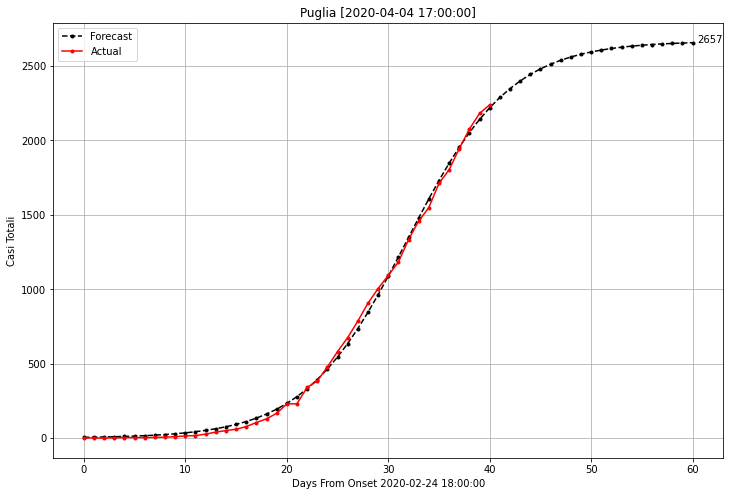

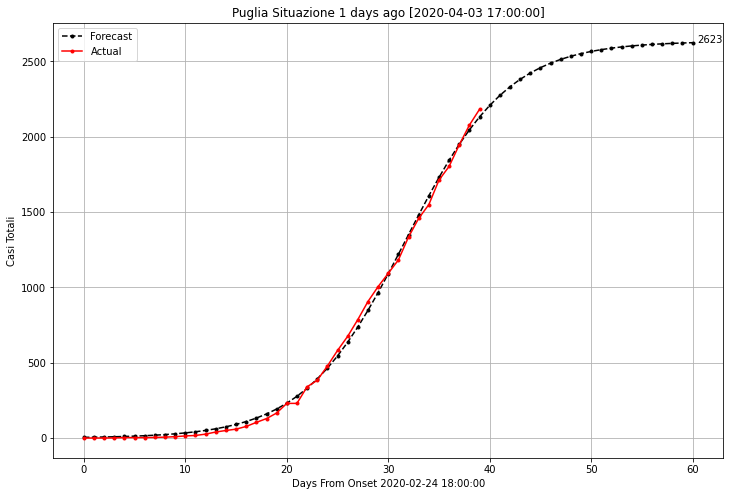

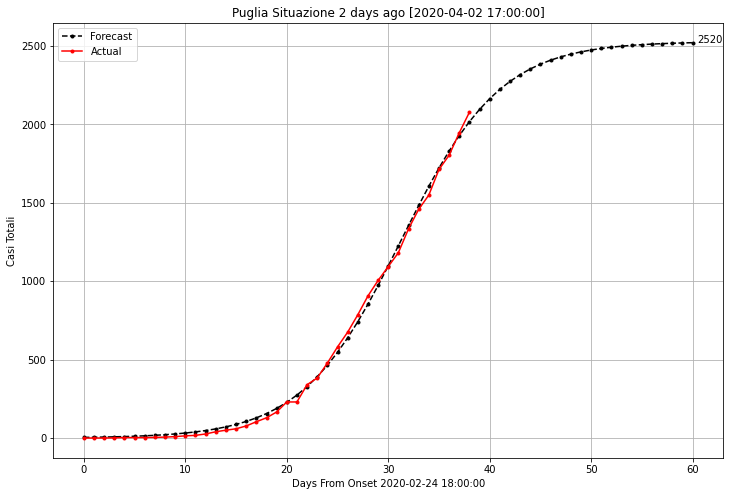

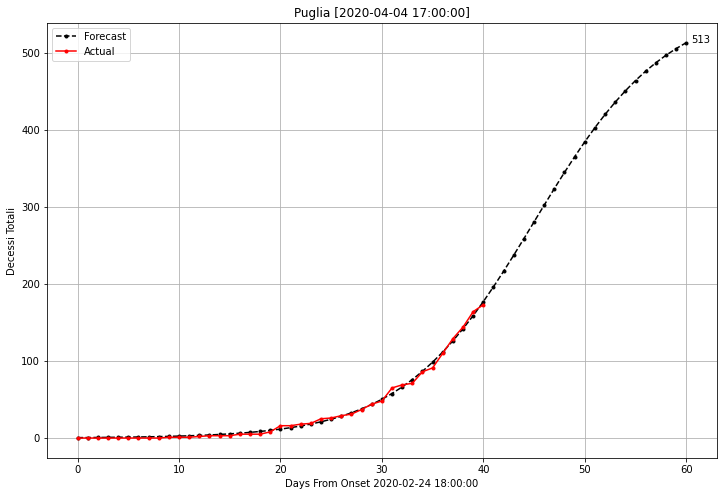

In [15]:
region_name = 'Puglia'
[dates_col, tot_casi_col, tot_healed_col, tot_deaths_col, new_positive_col,
     tot_actual_positive_col, tot_swabs_col, tot_hospitalized, tot_dom, 
     intensitive_care] = retrieve_region (region_name = region_name)

_, _ = forecast_using_curve_fit(dates_col, tot_casi_col, time_horizon=time_horizon, title=region_name, ylabel='Casi Totali')
_, _ = forecast_using_curve_fit(dates_col, tot_casi_col, time_horizon=time_horizon + 1, title=region_name, ylabel='Casi Totali', stop_at_previous_days=1)
_, _ = forecast_using_curve_fit(dates_col, tot_casi_col, time_horizon=time_horizon + 2, title=region_name, ylabel='Casi Totali', stop_at_previous_days=2)

_, _ = forecast_using_curve_fit(dates_col, tot_deaths_col, time_horizon=time_horizon, title=region_name, ylabel='Decessi Totali')

Casi Totali Lombardia


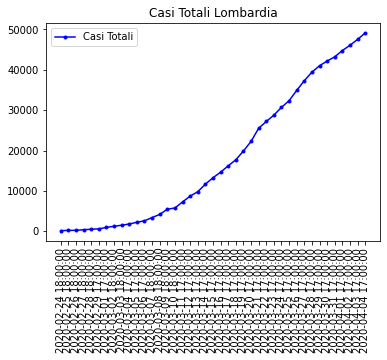

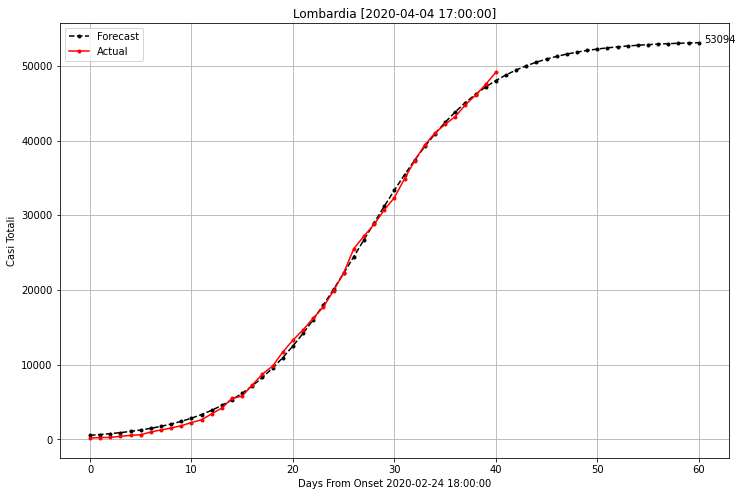

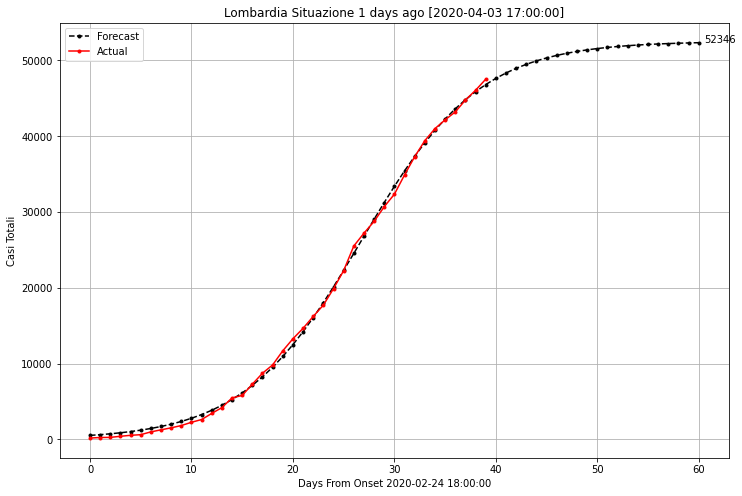

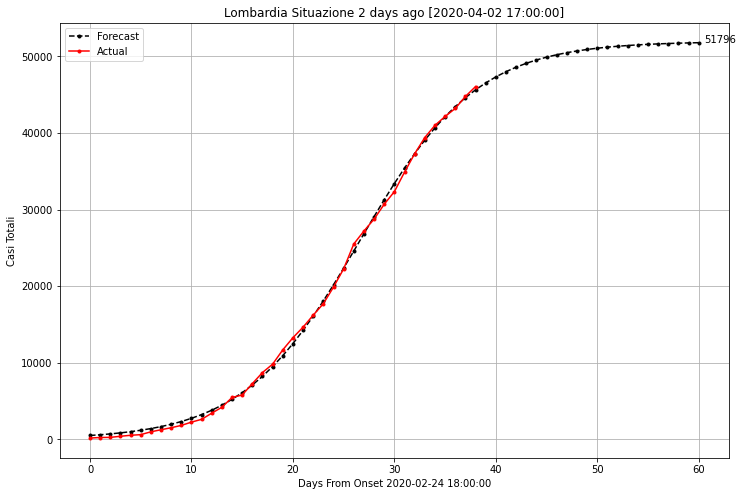

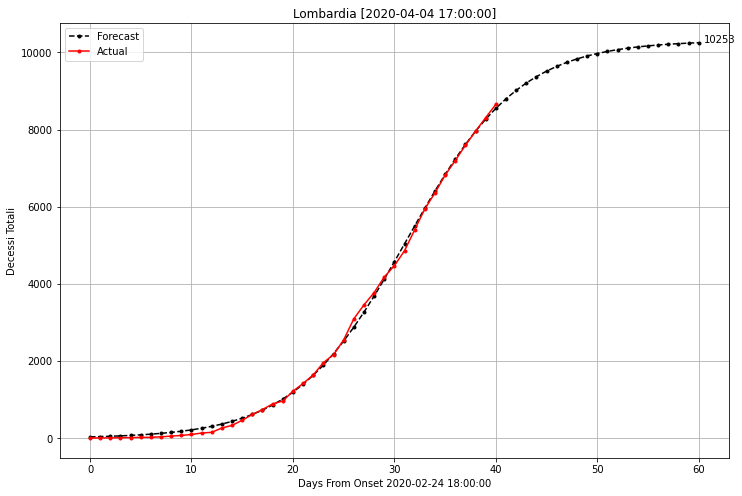

In [16]:
region_name = 'Lombardia'
[dates_col, tot_casi_col, tot_healed_col, tot_deaths_col, new_positive_col,
     tot_actual_positive_col, tot_swabs_col, tot_hospitalized, tot_dom, 
     intensitive_care] = retrieve_region (region_name = region_name)

_, _ = forecast_using_curve_fit(dates_col, tot_casi_col, time_horizon=time_horizon, title=region_name, ylabel='Casi Totali')
_, _ = forecast_using_curve_fit(dates_col, tot_casi_col, time_horizon=time_horizon + 1, title=region_name, ylabel='Casi Totali', stop_at_previous_days=1)
_, _ = forecast_using_curve_fit(dates_col, tot_casi_col, time_horizon=time_horizon + 2, title=region_name, ylabel='Casi Totali', stop_at_previous_days=2)

_, _ = forecast_using_curve_fit(dates_col, tot_deaths_col, time_horizon=time_horizon, title=region_name, ylabel='Decessi Totali')

Casi Totali Piemonte


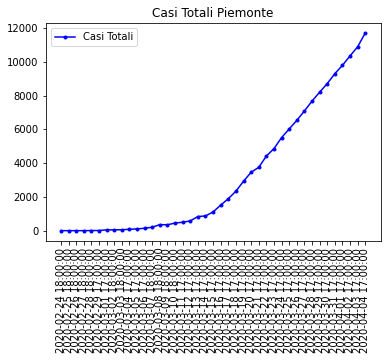

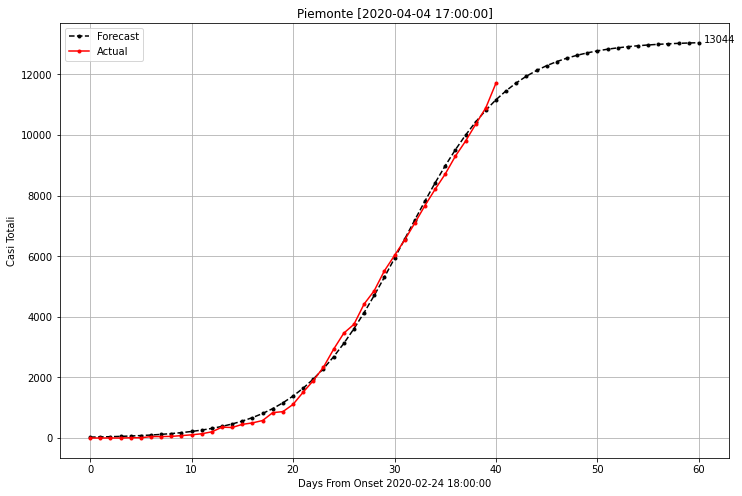

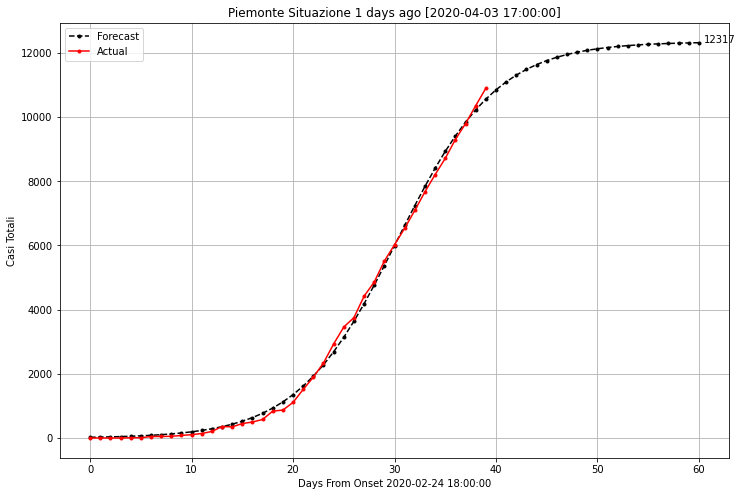

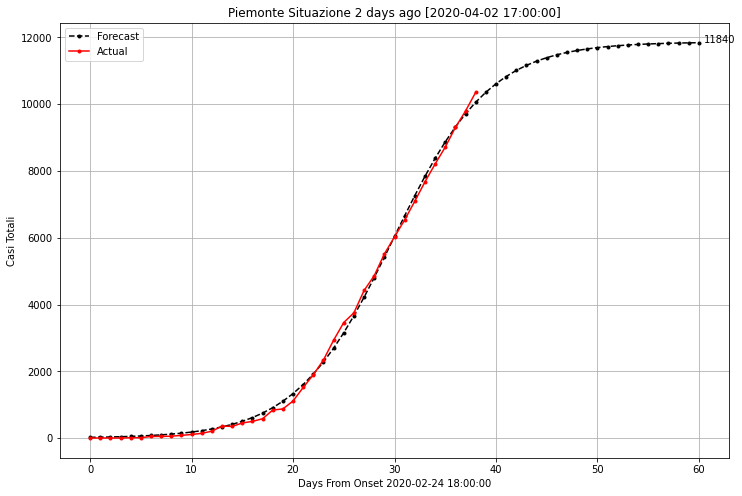

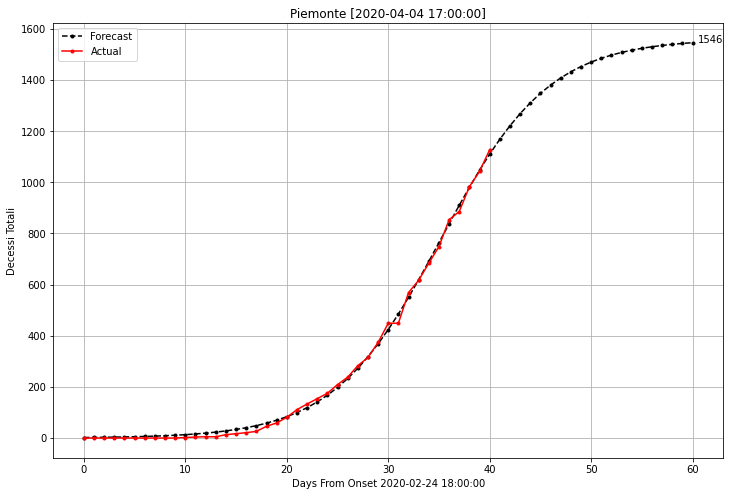

In [17]:
region_name = 'Piemonte'
[dates_col, tot_casi_col, tot_healed_col, tot_deaths_col, new_positive_col,
     tot_actual_positive_col, tot_swabs_col, tot_hospitalized, tot_dom, 
     intensitive_care] = retrieve_region (region_name = region_name)

_, _ = forecast_using_curve_fit(dates_col, tot_casi_col, time_horizon=time_horizon, title=region_name, ylabel='Casi Totali')
_, _ = forecast_using_curve_fit(dates_col, tot_casi_col, time_horizon=time_horizon + 1, title=region_name, ylabel='Casi Totali', stop_at_previous_days=1)
_, _ = forecast_using_curve_fit(dates_col, tot_casi_col, time_horizon=time_horizon + 2, title=region_name, ylabel='Casi Totali', stop_at_previous_days=2)

_, _ = forecast_using_curve_fit(dates_col, tot_deaths_col, time_horizon=time_horizon, title=region_name, ylabel='Decessi Totali')

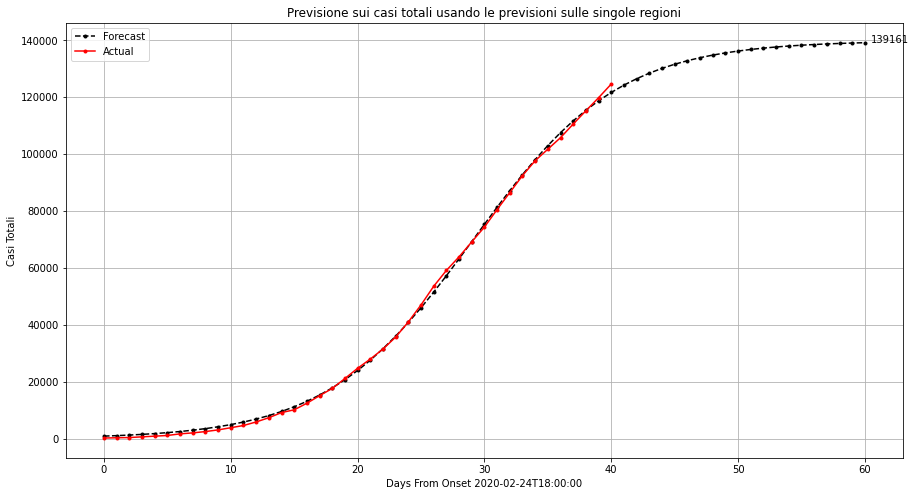

In [18]:
# Forecast using the regional models - Casi Totali

total_y_m = np.zeros((len(tot_casi_col) + time_horizon))

for region in df_regioni_covid['denominazione_regione'].unique():
  [dates_col, tot_casi_col, tot_healed_col, tot_deaths_col, new_positive_col,
     tot_actual_positive_col, tot_swabs_col, tot_hospitalized, tot_dom, 
     intensitive_care] = retrieve_region (region_name = region, plot_fig=False)
  try:
    x_m, y_m = forecast_using_curve_fit(dates_col, tot_casi_col, time_horizon=time_horizon, title=region, ylabel='Casi Totali', plot_fig=False)
  except:
    print('*** Error on Fit for Region ', region, ' ***')
  
  total_y_m += y_m

tot_casi_col = df_ita_covid["totale_casi"].tolist()
dates_col = df_ita_covid["data"].tolist()

x = np.arange(0, len(dates_col))

# creating the matplotlib visualization
plt.figure(figsize=(15,8))
plt.plot(x_m, total_y_m, c='k', marker=".", linestyle='dashed') 
plt.text(x_m[-1]+.5, total_y_m[-1], str(int(total_y_m[-1])), size = 10)

plt.plot(x, tot_casi_col, c='r', marker=".")
plt.xlabel("Days From Onset " + str(dates_col[0]))
plt.ylabel('Casi Totali')
plt.legend(['Forecast', 'Actual'])
plt.title('Previsione sui casi totali usando le previsioni sulle singole regioni')
plt.grid()

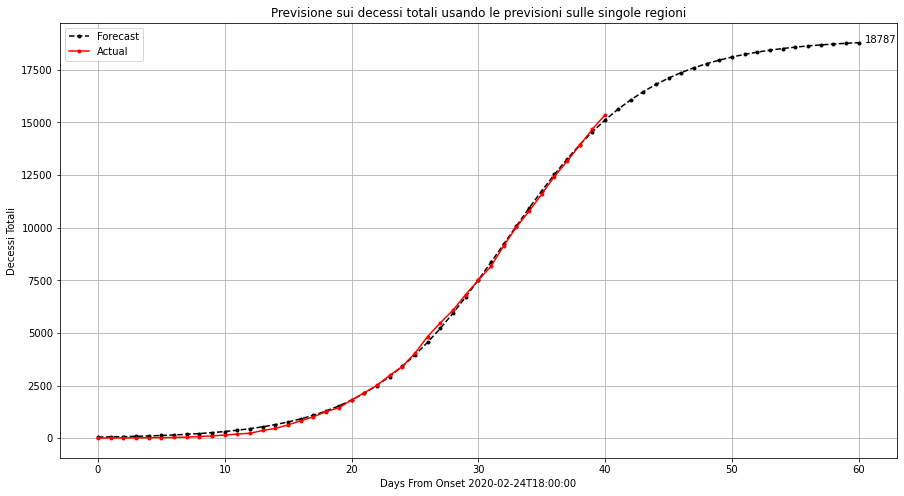

In [19]:
# Forecast using the regional models - Decessi Totali

total_y_m = np.zeros((len(tot_deaths_col) + time_horizon))

for region in df_regioni_covid['denominazione_regione'].unique():
  [dates_col, tot_casi_col, tot_healed_col, tot_deaths_col, new_positive_col,
     tot_actual_positive_col, tot_swabs_col, tot_hospitalized, tot_dom, 
     intensitive_care] = retrieve_region (region_name = region, plot_fig=False)
  try:
    x_m, y_m = forecast_using_curve_fit(dates_col, tot_deaths_col, time_horizon=time_horizon, title=region, ylabel='Decessi Totali', plot_fig=False)
  except:
    print('*** Error on Fit for Region ', region, ' ***')

  total_y_m += y_m

tot_deaths_col = df_ita_covid["deceduti"].tolist()
dates_col = df_ita_covid["data"].tolist()

x = np.arange(0, len(dates_col))

# creating the matplotlib visualization
plt.figure(figsize=(15,8))
plt.plot(x_m, total_y_m, c='k', marker=".", linestyle='dashed') 
plt.text(x_m[-1]+.5, total_y_m[-1], str(int(total_y_m[-1])), size = 10)

plt.plot(x, tot_deaths_col, c='r', marker=".")
plt.legend(['Forecast', 'Actual'])
plt.xlabel("Days From Onset " + str(dates_col[0]))
plt.ylabel('Decessi Totali')
plt.title('Previsione sui decessi totali usando le previsioni sulle singole regioni')
plt.grid()